In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from PIL import Image
import random
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical

FileNotFoundError: [Errno 2] No such file or directory: '../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_aca/'

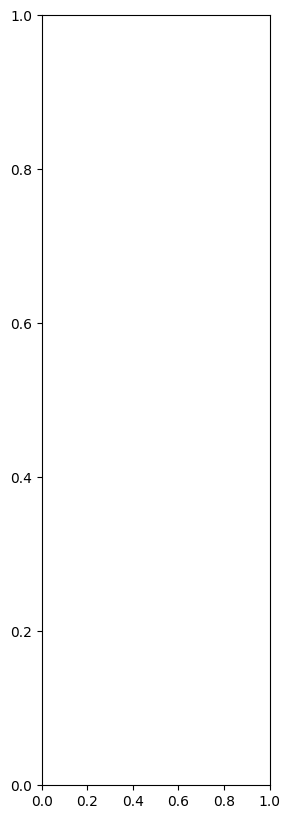

In [4]:
lung_aca = "../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_aca/"

plt.figure(figsize = (10, 10))
plt.subplot(131)
img = cv2.imread(lung_aca + os.listdir(lung_aca)[0])
plt.title('Lung ACA')
plt.imshow(img)

plt.subplot(132)
lung_n = "../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_n/"
img = cv2.imread(lung_n + os.listdir(lung_n)[0])
plt.title('Lung N')
plt.imshow(img)

plt.subplot(133)
lung_scc = "../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_scc/"
img = cv2.imread(lung_scc + os.listdir(lung_scc)[0])
plt.title('Lung SCC')
plt.imshow(img)
plt.show()

In [ ]:
data_dir = "../input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/"

SIZE_X = SIZE_Y = 128

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.3)

train_it = datagen.flow_from_directory(data_dir,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 12, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validate_it = datagen.flow_from_directory(data_dir,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 12, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

In [ ]:
def get_accuracy_metrics(model, train_it, validate_it):
    y_val = validate_it.classes
    
    val_pred_proba = model.predict(validate_it)
    
    val_pred_proba, predicted_proba, y_val, y_test = train_test_split(val_pred_proba, y_val, test_size = 0.5, shuffle = True)
    
    val_pred = np.argmax(val_pred_proba, axis = 1)
    predicted = np.argmax(predicted_proba, axis = 1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(train_it.classes, np.argmax(model.predict(train_it), axis = 1))*100), "%")
    
    print("Val accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_val, val_pred)*100), "%")
    
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, predicted)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, predicted, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, predicted)*100), "%")
    
    
    print("ROC AUC Score------------->")
    print("{0:.3f}".format(roc_auc_score(to_categorical(y_test, num_classes = 3), predicted_proba, multi_class='ovr')*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, predicted, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, predicted, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, predicted)
    cf_matrix_val = confusion_matrix(y_val, val_pred)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()

# Inputx128x128x64x32x16x16x8x8xFlattenxOutput

In [ ]:
inp = Input(shape = (128, 128, 3))
model = BatchNormalization()(inp)
model = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation='relu')(model)
model = BatchNormalization()(model)
model = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation='relu')(model)
model = MaxPooling2D()(model)
model = Dropout(0.2)(model)
model = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation='relu')(model)
model = MaxPooling2D()(model)
model = Dropout(0.2)(model)
model = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation='relu')(model)
model = MaxPooling2D()(model)
model = Dropout(0.2)(model)
model = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation='relu')(model)
model = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation='relu')(model)
model = MaxPooling2D()(model)
model = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation='relu')(model)
model = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation='relu')(model)
model = Flatten()(model)
output = Dense(units = len(train_it.class_indices), activation = 'softmax')(model)

model = Model(inputs=inp, outputs=output)
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(train_it, validation_data = validate_it, verbose = 1, epochs = 10, callbacks = [es])

In [ ]:
get_accuracy_metrics(model, train_it, validate_it)